In [295]:
# importing data manipulation as well as plotting packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importing statistical packages
import statsmodels.api as sm
import scipy
import re

%matplotlib inline

In [296]:
# importing the environment canada data set with the date as the index column
gwv_data = pd.read_csv('../data/c46131.csv', sep=',', index_col='DATE')

# Deleting empty columns
del gwv_data['WSS$']
del gwv_data['WSS$.1']

# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

In [297]:
zoo= pd.read_csv('../data/Zooplankton_2009-2012.csv', sep=',', index_col='Date')
zoo.index = pd.to_datetime(zoo.index, unit='d')

Now that I have my zooplankton data for the Northern Strait of Georgia area, I want to create a timeseries plot comparing the zooplankton abundance for a certain year to the significant wave height and the sea surface temperature. This plot will allow me to visually observe the trends of these three varaibles over the course of the spring bloom season. 

The largest problem with producing a timeseries plot for these datasets is the mismatch in their observation frequencies. In other words, the zooplnakton data was recorded once a week for some months, but roughly twice a week for others, whereas the environment Canada dataset was recorded once every hour. However, these observation frequencies will need to be unified in order to produce a graph. To overcome this problem, I averaged the zooplankton abundance data over a week long period, so that no matter how many times in a week the plankton were sampled, only 1 data point would exist for that week. Similarly I averaged all of the environment Canada data out over a week long period. I just had to make sure that the date timeline of the environment Canada data was approximately as long as date timeline of the zooplnakton data to ensure that I got the same number of weeks for both data sets. 

In [22]:
# Resampling the gwv_data (environment Canada data) into weekly averages for the spring of 2009 
# Chagning the data index (time) into pandas datetime format
gwv_data.index = pd.to_datetime(gwv_data.index, unit='m')

# Collapsing the data so that all data are averaged over a weekly perdiod
gwv_weekly = gwv_data.resample('W', how=('mean'))

# Subsetting the data for the spring plankton bloom in the 2009 
gwv_sp2009_weekly = gwv_weekly['2009-02-24':'2009-07-05'] 

# dropping the rows where naN's are present in anticipation of calculating the linear model (just in case)
gwv_sp2009_weekly = gwv_sp2009_weekly.dropna()
gwv_sp2009_weekly.head(n=2)
    

,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,sig_wave_height,wave_spectrum_peak_period,sig_wave_height_bouy,maximum_zero_crossing_wave,wave_spectrum_peak_period_bouy,wind_direction,wind_speed,wind_gust_speed,wind_direction.1,wind_speed.1,wind_gust_speed.1,sea_level_atmospheric_pressure,sea_level_atmospheric_pressure.1,dry_bulb_air_temperature,sea_surface_temperature
DATE,,,,,,,,,,,,,,,,,,,
2009-03-01,1.821429,49.91,124.99,14,0.301429,3.386369,0.295238,0.684524,3.273214,208.934524,4.554167,5.676786,209.232143,4.901786,6.13631,1013.880357,1013.929167,4.255952,6.850595
2009-03-08,1.107784,49.91,124.99,14,0.389880,3.078623,0.390419,0.922156,3.087425,244.922156,5.694611,7.136527,234.323353,6.044311,7.62515,1011.767066,1011.811377,5.823952,7.107784


In [23]:
# Now resampling the plankton data into weekly averages of abundance to match the environment Canada data
zoo_2009_weekly = zoo_2009.resample('W', how=('mean'))
zoo_2009_weekly.head(n=2)

,copepods,Cirripedia,euph. larvae,euphausid,Ostracods,Oiklioplera,Bryozoan Larvae(m3),Decapod,Cnidarians,Annelids,Malacostra,Cladocera,Chaetognath,mollusc/gastropod,Other larvae,Total
Date,,,,,,,,,,,,,,,,
2009-03-01,56.36,0.13,0,0.51,1.65,1.40,0.13,0.76,2.42,0,0.25,0,0.51,0,0.89,65.01
2009-03-08,1.15,70.23,0,0.25,1.27,0.25,0.38,1.02,1.27,0,0.89,0,0.51,0,0.00,77.35


In [18]:
#Ensuring that the zooplankton data and the environment Canada data have the same number of rows/weeks
print(zoo_2009_weekly.shape)
print(gwv_sp2009_weekly.shape)

(19, 16)
(19, 19)


Now that the environment Canada data and the zooplankton data have been averaged weekly over the same spring duration, I can now add my three varaibles of interest (zooplankton abundance, sea surface temperature, and significant into one dataframe. I believe this will make plotting and statistical analysis easier in the future.

In [110]:
# Creating a Dataframe that combines the zooplankton data as well as the sea surface temperature and significant wave height
combination_data_2009 = pd.DataFrame({'zoo_abundance': zoo_2009_weekly.Total, 'sea_surface_temperature': gwv_sp2009_weekly.sea_surface_temperature, 'significant_wave_height': gwv_sp2009_weekly.sig_wave_height })
combination_data_2009.head()

,sea_surface_temperature,significant_wave_height,zoo_abundance
DATE,,,
2009-03-01,6.850595,0.301429,65.010
2009-03-08,7.107784,0.389880,77.350
2009-03-15,6.998802,0.476826,339.820
2009-03-22,7.544311,0.977545,149.490
2009-03-29,7.559880,0.475150,225.255


Now that I have a dateframe containing my three varaibles of interest (zooplaknton abundance, sea surface temperature and significant wave height), I can plot all of these on a timeseries plot to compare their trends.

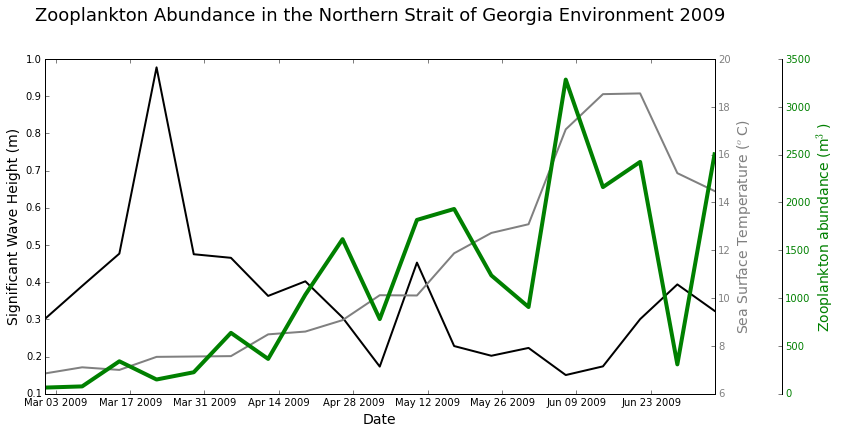

In [32]:
# Creating a timeseries plot of average zooplankton abundance, sea surface temperature and significant wave height per week for the spring of 2009
# This plot requires 3 y-axes, thus I need to first make a subplot called ax1 (subplot required for later spine adding step)
fig, ax1 = plt.subplots()

# adds the spines (or axes) for the second (ax2) and third (ax3) plot on top of the first plot
# layering the plots on top of one another
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outline above
# Setting the color and width of lines on the graph
ax1.plot(gwv_sp2009_weekly.index, gwv_sp2009_weekly.sig_wave_height, 'k-', linewidth =2)
ax2.plot(gwv_sp2009_weekly.index, gwv_sp2009_weekly.sea_surface_temperature, 'grey', linewidth=2)
ax3.plot(zoo_2009_weekly.index, zoo_2009_weekly.Total, 'g-', linewidth=4)

# Adjusting the figure size
fig.set_size_inches(12, 6)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
zoo_spine = ax3.spines['right']
zoo_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')

# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Date', fontsize=14, y=0)
ax1.set_ylabel('Significant Wave Height (m)', fontsize = 14, color ='k')
ax2.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 14, color='grey')
ax3.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 14, color='g')

# Creating an axes title
plt.title('Zooplankton Abundance in the Northern Strait of Georgia Environment 2009', fontsize=18, y=1.1)

# Showing the plot
plt.show()

In [298]:
def spring_wk(dataset_1, dataset_2, year, column_1, column_2, column_3):
    '''This function will average data per week over the spring of 2012, 2011, 2010 or 
    2009 for my two datasets'''
    
    assert 2009 <= year <= 2012, 'Year should be between 2009 and 2012'
    assert len(dataset_1) > 1
    assert len(dataset_2) > 1
    # Ensuring dataset_1 index (time) is in pandas datetime format
    dataset_1.index = pd.to_datetime(dataset_1.index, unit='m')

    # Resampling the columns from dataset_1 into weekly averages
    column_1_weekly = column_1.resample('W', how=('mean'))
    column_2_weekly = column_2.resample('W', how=('mean'))
    
    # Subsetting the columns from dataset_1 for the spring plankton bloom in the specified year
    if year == 2009:
        first ='2009-02-24'
        last = '2009-07-05' 
    if year == 2010:
        first = '2010-03-03'
        last = '2010-6-28'   
    if year == 2011:
        first = '2011-03-07'
        last = '2011-07-03'
    if year == 2012:
        first ='2012-03-30'
        last = '2012-07-01'
    column_1_weekly_year = column_1_weekly[first:last]
    column_2_weekly_year = column_2_weekly[first:last]
    
    

    # dropping the rows where naN's are present in dataset_1
    column_1_weekly_year_new = column_1_weekly_year.dropna()
    column_2_weekly_year_new = column_2_weekly_year.dropna()
    
    # Ensuring dataset_2 index (time) in in pandas datetime format
    dataset_2.index = pd.to_datetime(dataset_2.index, unit='d')
    
    # Now resampling column from dataset_2 into weekly averages over the desired spring
    if year == 2009:
        yr = '2009'
    if year == 2010:
        yr = '2010'
    if year == 2011:
        yr = '2011'
    if year == 2012:
        yr = '2012'
    column_3_year = column_3[yr]
    column_3_year_weekly = column_3_year.resample('W', how=('mean'))
    
    combination_data = pd.DataFrame({column_1.name : column_1_weekly_year_new, column_2.name : column_2_weekly_year_new, column_3.name : column_3_year_weekly})
    
    return combination_data

In [299]:
comb_2012 = spring_wk(gwv_data, zoo, 2012, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total_Zooplankton_Abundance)
comb_2011 = spring_wk(gwv_data, zoo, 2011, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total_Zooplankton_Abundance)
comb_2010 = spring_wk(gwv_data, zoo, 2010, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total_Zooplankton_Abundance)
comb_2009 = spring_wk(gwv_data, zoo, 2009, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total_Zooplankton_Abundance)

In [301]:
def timeseries(dataset, variable_1, variable_2, variable_3, savename):
    '''Function plots any three varaibles into timeseries plot and saves plot '''
    # layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
    # layering completed with twinx() method
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    # plotting the 3 variables into the predetermined plot outlined above
    # Setting the color and width of lines on the graph
    ax1.plot(dataset.index, variable_1, 'k-', linewidth =2)
    ax2.plot(dataset.index, variable_2, 'grey', linewidth=2)
    ax3.plot(dataset.index, variable_3, 'g-', linewidth=4)
    
    # moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
    variable_3_spine = ax3.spines['right']
    variable_3_spine.set_position(('axes', 1.2))

    # Adjusting the color of the axes ticks to match line color
    ax1.yaxis.set_tick_params(labelcolor='k')
    ax2.yaxis.set_tick_params(labelcolor='grey')
    ax3.yaxis.set_tick_params(labelcolor='green')
    
    # Making axes labels, selecting their color, and selecting their size
    ax1.set_xlabel(dataset.index.name, fontsize=14, y=0)
    ax1.set_ylabel(variable_1.name, fontsize = 13, color ='k')
    ax2.set_ylabel(variable_2.name + '($^o$C)', fontsize = 13, color='grey')
    ax3.set_ylabel(variable_3.name + '(m$^3$)', fontsize = 13, color='g')
    
    plt.savefig(savename)

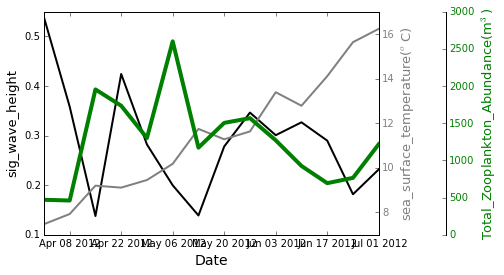

In [302]:
# testing this function for the year 2012
timeseries(comb_2012, comb_2012.sig_wave_height, comb_2012.sea_surface_temperature, comb_2012.Total_Zooplankton_Abundance, 'tseries_2012')

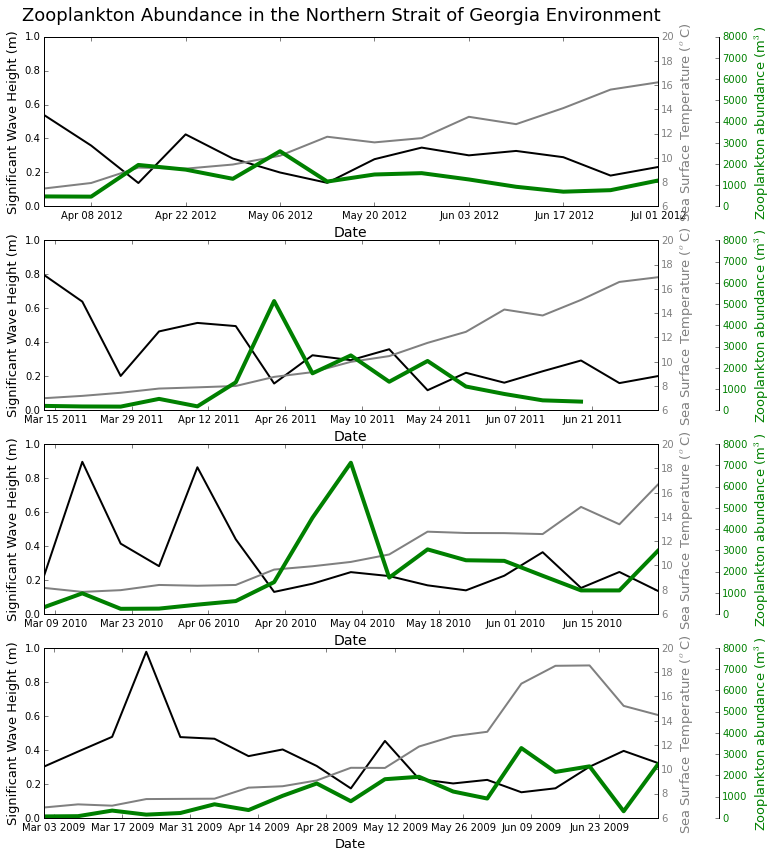

In [113]:
# Creating 4 timeseries subplots for the weekly averages of zooplankton abundance, sea surface temperature, and significant wave height during the springs of 2009-2012

# Adjusting the figure size
fig = plt.figure(figsize=(11, 14)) 

#Creating a super title for all of my subplots
plt.suptitle('Zooplankton Abundance in the Northern Strait of Georgia Environment', fontsize=18, y=0.93)

# CREATING THE FIRST SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot(4,1,1)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(comb_2012.index, comb_2012.column_1, 'k-', linewidth =2)
ax2.plot(comb_2012.index, comb_2012.column_2, 'grey', linewidth=2)
ax3.plot(comb_2012.index, comb_2012.column_3, 'g-', linewidth=4)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
column_3_spine = ax3.spines['right']
column_3_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')

# Setting the y limits (to Standardize across the subplots)
ax1.set_ylim([0, 1])
ax2.set_ylim([6, 20])
ax3.set_ylim([0, 8000])

# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel('Date', fontsize=14, y=0)
ax1.set_ylabel('Significant Wave Height (m)', fontsize = 13, color ='k')
ax2.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 13, color='grey')
ax3.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 13, color='g')

# CREATING THE SECOND SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax4 = plt.subplot(4,1,2)
ax5 = ax4.twinx()
ax6 = ax4.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax4.plot(comb_2011.index, comb_2011.column_1, 'k-', linewidth =2)
ax5.plot(comb_2011.index, comb_2011.column_2, 'grey', linewidth=2)
ax6.plot(comb_2011.index, comb_2011.column_3, 'g-', linewidth=4)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
column_6_spine = ax6.spines['right']
column_6_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax4.yaxis.set_tick_params(labelcolor='k')
ax5.yaxis.set_tick_params(labelcolor='grey')
ax6.yaxis.set_tick_params(labelcolor='green')

# Setting the y limits (to Standardize across the subplots)
ax4.set_ylim([0, 1])
ax5.set_ylim([6, 20])
ax6.set_ylim([0, 8000])

# Making axes labels, selecting their color, and selecting their size
ax4.set_xlabel('Date', fontsize=14, y=0)
ax4.set_ylabel('Significant Wave Height (m)', fontsize = 13, color ='k')
ax5.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 13, color='grey')
ax6.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 13, color='g')

# CREATING THE THIRD SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax7 = plt.subplot(4,1,3)
ax8 = ax7.twinx()
ax9 = ax7.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax7.plot(comb_2010.index, comb_2010.column_1, 'k-', linewidth =2)
ax8.plot(comb_2010.index, comb_2010.column_2, 'grey', linewidth=2)
ax9.plot(comb_2010.index, comb_2010.column_3, 'g-', linewidth=4)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
column_9_spine = ax9.spines['right']
column_9_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax7.yaxis.set_tick_params(labelcolor='k')
ax8.yaxis.set_tick_params(labelcolor='grey')
ax9.yaxis.set_tick_params(labelcolor='green')

# Setting the y limits (to Standardize across the subplots)
ax7.set_ylim([0, 1])
ax8.set_ylim([6, 20])
ax9.set_ylim([0, 8000])

# Making axes labels, selecting their color, and selecting their size
ax7.set_xlabel('Date', fontsize=14, y=0)
ax7.set_ylabel('Significant Wave Height (m)', fontsize = 13, color ='k')
ax8.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 13, color='grey')
ax9.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 13, color='g')

# CREATING THE FOURTH SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax10= plt.subplot(4,1,4)
ax11= ax10.twinx()
ax12= ax10.twinx()

# Setting the color and width of lines on the graph
ax10.plot(comb_2009.index, comb_2009.column_1, 'k-', linewidth =2)
ax11.plot(comb_2009.index, comb_2009.column_2, 'grey', linewidth=2)
ax12.plot(comb_2009.index, comb_2009.column_3, 'g-', linewidth=4)

# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
column_12_spine = ax12.spines['right']
column_12_spine.set_position(('axes', 1.1))

# Adjusting the color of the axes ticks to match line color
ax10.yaxis.set_tick_params(labelcolor='k')
ax11.yaxis.set_tick_params(labelcolor='grey')
ax12.yaxis.set_tick_params(labelcolor='green')

# Setting the y limits (to Standardize across the subplots)
ax10.set_ylim([0, 1])
ax11.set_ylim([6, 20])
ax12.set_ylim([0, 8000])

# Making axes labels, selecting their color, and selecting their size
ax10.set_xlabel('Date', fontsize=13, y=0)
ax10.set_ylabel('Significant Wave Height (m)', fontsize = 13, color ='k')
ax11.set_ylabel('Sea Surface Temperature ($^o$C)', fontsize = 13, color='grey')
ax12.set_ylabel('Zooplankton abundance (m$^3$)', fontsize = 13, color='g')


# Showing the plot
plt.show()
    

In [114]:
zoo_all=pd.DataFrame({'column_1': comb_2012.column_3, 'column_2':comb_2011.column_3, 'column_3': comb_2010.column_3, 'column_4': comb_2009.column_3})

In [120]:
zoo_all.head()

,column_1,column_2,column_3,column_4
DATE,,,,
2009-03-01,NaN,NaN,NaN,65.010
2009-03-08,NaN,NaN,NaN,77.350
2009-03-15,NaN,NaN,NaN,339.820
2009-03-22,NaN,NaN,NaN,149.490
2009-03-29,NaN,NaN,NaN,225.255


In [ ]:
from statsmodels.formula.api import ols

In [278]:
def linear_model_plot(x_variable, y_variable):
    
    y = y_variable # response
    X = x_variable # predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    lm = sm.formula.OLS(y, X).fit()
    
    x_pred = np.linspace(x_variable.min(), x_variable.max(), 50)

    x_pred2 = sm.add_constant(x_pred)

    y_pred = lm.predict(x_pred2)

    plt.plot(x_pred, y_pred, color='k', linewidth=2)

    

    # Obtaining the linear regression statistical summary
    return plt.plot()

In [ ]:
def multi_linearmodel_plot(x_varaible, x2_variable, y_varaible):
    
    y = y_variable
    x = x_varaible
    x2 = x2_variable
    lm=ols('column_3 ~ column_1 * column_2', data=comb_2009).fit() #Specify C for Categorical
    print(sm.stats.anova_lm(lm, typ=2))
    print(lm.summary())

In [279]:
def linear_regression(x_variable_1, y_variable_1, x_variable_2, y_variable_2, x_variable_3, y_variable_3, x_variable_4, y_variable_4):
    '''This function produces four subplots showing the linear 
    regression line between two specified varaibles '''
    # adjusting the figure size
    fig = plt.figure(figsize=(10, 7)) 
    # Creating a super title for the subplots
    plt.suptitle('Sea Surface temperature and Significant Wave height', fontsize=16, y=1.01)

    # Subplots are created individually
    
    # FIRST SUBPLOT
    
    # plots and denotes the position of the subplot
    plt.subplot(2,2,1)
    plt.scatter(x_variable_1, y_variable_1)
    # Creates the linear model and applies linear regression to subplot
    linear_model_plot(x_variable_1, y_variable_1)
    # Adjusting y axis limit to keep unity between subplots
    plt.ylim(0,1.2)
    # Creating axis labels and title
    plt.ylabel('Significant Wave Height')
    plt.xlabel('Sea Surface Temperature')
    plt.title('2012')

    #SECOND SUBPLOT
    
    # plots and denotes the position of the subplot
    plt.subplot(2,2,2)
    plt.scatter(x_variable_2, y_variable_2)
    # Creates the linear model and applies linear regression to subplot
    linear_model_plot(x_variable_2, y_variable_2)
    # Adjusting y axis limit to keep unity between subplots
    plt.ylim(0,1.2)
    # Creating axis labels and title
    plt.ylabel('Significant Wave Height')
    plt.xlabel('Sea Surface Temperature')
    plt.title('2011')

    # THIRD SUBPLOT
    
    # plots and denotes the position of the subplot
    plt.subplot(2,2,3)
    plt.scatter(x_variable_3, y_variable_3)
    # Creates the linear model and applies linear regression to subplot
    linear_model_plot(x_variable_3, y_variable_3)
    # Adjusting y axis limit to keep unity between subplots
    plt.ylim(0,1.2)
    # Creating axis labels and title
    plt.ylabel('Significant Wave Height')
    plt.xlabel('Sea Surface Temperature')
    plt.title('2010')
    
    # FOURTH SUBPLOT
    
    # plots and denotes the position of the subplot
    plt.subplot(2,2,4)
    plt.scatter(x_variable_4, y_variable_4)
    # Creates the linear model and applies linear regression to subplot
    linear_model_plot(x_variable_4, y_variable_4)
    # Adjusting y axis limit to keep unity between subplots
    plt.ylim(0,1.2)
    # Creating axis labels and title
    plt.ylabel('Significant Wave Height')
    plt.xlabel('Sea Surface Temperature')
    plt.title('2009')

In [280]:
linear_regression(comb_2012.column_2, comb_2012.column_1, comb_2011.column_2, comb_2011.column_1, comb_2010.column_2, comb_2010.column_1, comb_2009.column_2, comb_2009.column_1)

AttributeError: 'DataFrame' object has no attribute 'column_2'

In [332]:
def linear_model(x_variable, y_variable):
    
    y = y_variable # response
    X = x_variable # predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    lm = sm.formula.OLS(y, X).fit()
    
    return lm.summary()

In [334]:
linear_model(comb_2012.sea_surface_temperature, comb_2012.sig_wave_height)


//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        sig_wave_height   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.031
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.107
Time:                        23:44:14   Log-Likelihood:                 13.077
No. Observations:                  14   AIC:                            -22.15
Df Residuals:                      12   BIC:                            -20.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                       0.4956      0.122      4.055      0.002         0.229     0.762
sea_surface_temperature    -0.0181      0.010     -1.741      0.107        -0.041     0.005
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.342
Skew:                          -0.344   Prob(JB):                        0.843
Kurtosis:                       2.666   Cond. No.                         52.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
linear_model(comb_2011.column_2, comb_2011.column_1)


//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               column_1   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     10.32
Date:                Sun, 15 Nov 2015   Prob (F-statistic):            0.00582
Time:                        16:03:05   Log-Likelihood:                 8.9858
No. Observations:                  17   AIC:                            -13.97
Df Residuals:                      15   BIC:                            -12.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7185      0.126      5.698      0.000         0.450     0.987
column_2      -0.0357      0.011     -3.212      0.006        -0.059    -0.012
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.039
Skew:                           0.101   Prob(JB):                        0.981
Kurtosis:                       3.120   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
linear_model(comb_2010.column_2, comb_2010.column_1)


//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               column_1   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6.758
Date:                Sun, 15 Nov 2015   Prob (F-statistic):             0.0201
Time:                        16:03:10   Log-Likelihood:                 4.3507
No. Observations:                  17   AIC:                            -4.701
Df Residuals:                      15   BIC:                            -3.035
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.8409      0.208      4.034      0.001         0.397     1.285
column_2      -0.0483      0.019     -2.600      0.020        -0.088    -0.009
==============================================================================
Omnibus:                        6.317   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.790
Skew:                           1.110   Prob(JB):                        0.150
Kurtosis:                       3.651   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
linear_model(comb_2009.column_2, comb_2009.column_1)

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               column_1   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     6.234
Date:                Sun, 15 Nov 2015   Prob (F-statistic):             0.0231
Time:                        16:03:14   Log-Likelihood:                 8.5612
No. Observations:                  19   AIC:                            -13.12
Df Residuals:                      17   BIC:                            -11.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.6232      0.113      5.512      0.000         0.385     0.862
column_2      -0.0239      0.010     -2.497      0.023        -0.044    -0.004
==============================================================================
Omnibus:                       22.859   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.148
Skew:                           2.003   Prob(JB):                     1.05e-07
Kurtosis:                       7.955   Cond. No.                         35.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
lm = sm.formula.ols(formula='column_1 ~ column_2', data = comb_2012).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({'column_2': range(4, 20)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())



In [306]:
lm = sm.formula.ols(comb_2012.sig_wave_height, comb_2012.sea_surface_temperature).fit()

# Creating a new data frame with the range of x values that we will pass the linear model
range_data_x = pd.DataFrame({comb_2012.sea_surface_temperature: range(4, 20)})

# Calculating the linear model predictions from the x values in our range data set
y_preds = lm.predict(range_data_x)

plt.plot(range_data_x, y_preds, color='k', linewidth=3)
# Obtaining the intercept and slope of the linear model
print(lm.params)

# Obtaining the linear regression statistical summary
print(lm.summary())

PatsyError: model is missing required outcome variables

In [326]:
y = comb_2012.Total_Zooplankton_Abundance # response
X = comb_2012.sea_surface_temperature #predictor
X = X.append(comb_2012.sig_wave_height) # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
lm = ols(y, X).fit()

#print(lm.summary())

#lm=ols('column_3 ~ column_1 * column_2', data=comb_2009).fit() #Specify C for Categorical
    #print(sm.stats.anova_lm(lm, typ=2))
    # print(lm.summary())

    # Obtaining the linear regression statistical summary
   

PatsyError: model is missing required outcome variables

In [331]:
y = comb_2012.Total_Zooplankton_Abundance # response
X = comb_2012.sea_surface_temperature
x1= comb_2012.sig_wave_height# predictor
X1= sm.add_constant(X)
X = sm.add_constant(X1)  # Adds a constant term to the predictor
lm = sm.formula.OLS(y, X*X1).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total_Zooplankton_Abundance   R-squared:                       0.032
Model:                                     OLS   Adj. R-squared:                 -0.048
Method:                          Least Squares   F-statistic:                    0.3990
Date:                         Sun, 15 Nov 2015   Prob (F-statistic):              0.539
Time:                                 22:41:54   Log-Likelihood:                -108.57
No. Observations:                           14   AIC:                             221.1
Df Residuals:                               12   BIC:                             222.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  int(n))


[]

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


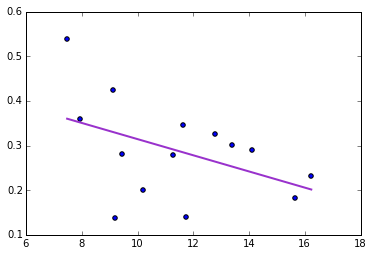

In [179]:
plt.scatter(comb_2012.column_2, comb_2012.column_1)
y = comb_2012.column_1 # response
X = comb_2012.column_2 # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
lm = sm.formula.OLS(y, X).fit()
    
x_pred = np.linspace(comb_2012.column_2.min(), comb_2012.column_2.max(), 50)

x_pred2 = sm.add_constant(x_pred)

y_pred = lm.predict(x_pred2)

plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

plt.plot()
#fig.savefig('filename2.png', dpi=125)

In [136]:
y = comb_2012.column_1 # response
X = comb_2012.column_2 # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
est = sm.OLS(y, X).fit()
est.summary()

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               column_1   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.031
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.107
Time:                        11:55:45   Log-Likelihood:                 13.077
No. Observations:                  14   AIC:                            -22.15
Df Residuals:                      12   BIC:                            -20.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4956      0.122      4.055      0.002         0.229     0.762
column_2      -0.0181      0.010     -1.741      0.107        -0.041     0.005
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.342
Skew:                          -0.344   Prob(JB):                        0.843
Kurtosis:                       2.666   Cond. No.                         52.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
def variance(name, n):
    '''assignes function to calculate the 
    standard error of a list or numpy array'''
    mean = sum(name)/n                        # creating a variable for the mean of the list/array
    std_part_1 = sum([(num-mean)**2 for num in name]) # creating a variable for the first caclulation of the standard deviation
    var = std_part_1/(n-1)         # Completing the standard deviation calculation 
    return(var)

TypeError: only integer arrays with one element can be converted to an index

In [239]:
from statsmodels.formula.api import ols

In [268]:


lm=ols('column_3 ~ column_1 * column_2', data=comb_2012).fit() #Specify C for Categorical
print(sm.stats.anova_lm(lm, typ=2))
print(lm.summary())


                           sum_sq  df         F    PR(>F)
column_1           1211428.236388   1  4.406382  0.062167
column_2            548108.455929   1  1.993659  0.188311
column_1:column_2   570990.561009   1  2.076890  0.180115
Residual           2749258.180893  10       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               column_3   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     2.253
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.145
Time:                        16:19:07   Log-Likelihood:                -105.18
No. Observations:                  14   AIC:                             218.4
Df Residuals:                      10   BIC:                             220.9
Df Model:                           3                                         

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  int(n))


In [267]:

lm=ols('column_3 ~ column_1 * column_2', data=comb_2011).fit() #Specify C for Categorical
#print(sm.stats.anova_lm(lm, typ=2))
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               column_3   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     2.313
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.128
Time:                        16:19:00   Log-Likelihood:                -133.21
No. Observations:                  16   AIC:                             274.4
Df Residuals:                      12   BIC:                             277.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          5090.9076   2636.71

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  int(n))


In [269]:
lm=ols('column_3 ~ column_1 * column_2', data=comb_2010).fit() #Specify C for Categorical
print(sm.stats.anova_lm(lm, typ=2))
print(lm.summary())

                            sum_sq  df         F    PR(>F)
column_1            2909569.068600   1  0.861995  0.370099
column_2             713107.765458   1  0.211267  0.653369
column_1:column_2     38891.312714   1  0.011522  0.916158
Residual           43880072.165484  13       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               column_3   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.7528
Date:                Sun, 15 Nov 2015   Prob (F-statistic):              0.540
Time:                        16:20:06   Log-Likelihood:                -149.61
No. Observations:                  17   AIC:                             307.2
Df Residuals:                      13   BIC:                             310.6
Df Model:                           3                                    

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  int(n))


In [270]:
lm=ols('column_3 ~ column_1 * column_2', data=comb_2009).fit() #Specify C for Categorical
print(sm.stats.anova_lm(lm, typ=2))
print(lm.summary())

                           sum_sq  df          F    PR(>F)
column_1            268508.731270   1   0.609996  0.446941
column_2           5753727.548790   1  13.071281  0.002544
column_1:column_2   364926.971625   1   0.829039  0.376950
Residual           6602712.638766  15        NaN       NaN
                            OLS Regression Results                            
Dep. Variable:               column_3   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     7.842
Date:                Sun, 15 Nov 2015   Prob (F-statistic):            0.00222
Time:                        16:20:23   Log-Likelihood:                -148.17
No. Observations:                  19   AIC:                             304.3
Df Residuals:                      15   BIC:                             308.1
Df Model:                           3                                    

//anaconda/lib/python3.4/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  int(n))


In [273]:
def spring_wk(dataset_1, dataset_2, year, column_1, column_2, column_3):
    '''This function will average data per week over the spring of 2012, 2011, 2010 or 
    2009 for my two datasets'''
    
    assert 2009 <= year <= 2012, 'Year should be between 2009 and 2012'
    assert len(dataset_1) > 1
    assert len(dataset_2) > 1
    # Ensuring dataset_1 index (time) is in pandas datetime format
    dataset_1.index = pd.to_datetime(dataset_1.index, unit='m')

    # Resampling the columns from dataset_1 into weekly averages
    column_1_weekly = column_1.resample('W', how=('mean'))
    column_2_weekly = column_2.resample('W', how=('mean'))
    
    # Subsetting the columns from dataset_1 for the spring plankton bloom in the specified year
    if year == 2009:
        first ='2009-02-24'
        last = '2009-07-05' 
    if year == 2010:
        first = '2010-03-03'
        last = '2010-6-28'   
    if year == 2011:
        first = '2011-03-07'
        last = '2011-07-03'
    if year == 2012:
        first ='2012-03-30'
        last = '2012-07-01'
    column_1_weekly_year = column_1_weekly[first:last]
    column_2_weekly_year = column_2_weekly[first:last]
    
    

    # dropping the rows where naN's are present in dataset_1
    column_1_weekly_year_new = column_1_weekly_year.dropna()
    column_2_weekly_year_new = column_2_weekly_year.dropna()
    
    # Ensuring dataset_2 index (time) in in pandas datetime format
    dataset_2.index = pd.to_datetime(dataset_2.index, unit='d')
    
    # Now resampling column from dataset_2 into weekly averages over the desired spring
    if year == 2009:
        yr = '2009'
    if year == 2010:
        yr = '2010'
    if year == 2011:
        yr = '2011'
    if year == 2012:
        yr = '2012'
    column_3_year = column_3[yr]
    column_3_year_weekly = column_3_year.resample('W', how=('mean'))
    
    combination_data = pd.DataFrame({column_1.name : column_1_weekly_year_new, column_2.name : column_2_weekly_year_new, column_3.name : column_3_year_weekly})
    
    return combination_data

In [274]:
comb_2012 = spring_wk(gwv_data, zoo, 2012, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total)
comb_2011 = spring_wk(gwv_data, zoo, 2011, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total)
comb_2010 = spring_wk(gwv_data, zoo, 2010, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total)
comb_2009 = spring_wk(gwv_data, zoo, 2009, gwv_data.sig_wave_height, gwv_data.sea_surface_temperature, zoo.Total)

In [275]:
def timeseries(dataset, variable_1, variable_2, variable_3):
    
    # layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
    # layering completed with twinx() method
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    # plotting the 3 variables into the predetermined plot outlined above
    # Setting the color and width of lines on the graph
    ax1.plot(dataset.index, variable_1, 'k-', linewidth =2)
    ax2.plot(dataset.index, variable_2, 'grey', linewidth=2)
    ax3.plot(dataset.index, variable_3, 'g-', linewidth=4)
    
    # moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
    variable_3_spine = ax3.spines['right']
    variable_3_spine.set_position(('axes', 1.1))

    # Adjusting the color of the axes ticks to match line color
    ax1.yaxis.set_tick_params(labelcolor='k')
    ax2.yaxis.set_tick_params(labelcolor='grey')
    ax3.yaxis.set_tick_params(labelcolor='green')
    
    # Making axes labels, selecting their color, and selecting their size
    ax1.set_xlabel(dataset.index.name, fontsize=14, y=0)
    ax1.set_ylabel(variable_1.name, fontsize = 13, color ='k')
    ax2.set_ylabel(variable_2.name + '($^o$C)', fontsize = 13, color='grey')
    ax3.set_ylabel(variable_3.name + '(m$^3$)', fontsize = 13, color='g')
    
    #plt.savefig(savename)

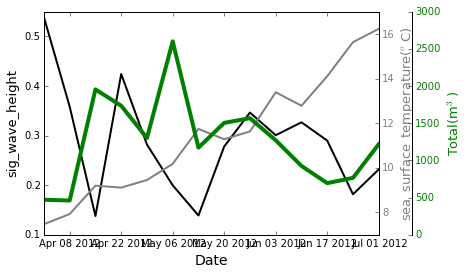

In [276]:
timeseries(comb_2012, comb_2012.sig_wave_height, comb_2012.sea_surface_temperature, comb_2012.Total)

In [ ]:
# Creating 4 timeseries subplots for the weekly averages of zooplankton abundance, sea surface temperature, and significant wave height during the springs of 2009-2012

# Adjusting the figure size
fig = plt.figure(figsize=(11, 14)) 

#Creating a super title for all of my subplots
plt.suptitle('Zooplankton Abundance in the Northern Strait of Georgia Environment', fontsize=18, y=0.93)

# CREATING THE FIRST SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
#x1 = timeseries(comb_2012, comb_2012.sig_wave_height, comb_2012.sea_surface_temperature, comb_2012.Total)
plt.subplot(4,1,1)
plt.plot(x1)

# CREATING THE SECOND SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
x2 = timeseries(comb_2011, comb_2011.sig_wave_height, comb_2011.sea_surface_temperature, comb_2011.Total)
plt.subplot(4,1,2)
plt.show(x2)

# CREATING THE THIRD SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
x3=timeseries(comb_2010, comb_2010.sig_wave_height, comb_2010.sea_surface_temperature, comb_2010.Total)
plt.subplot(4,1,3)
plt.show(x3)



# CREATING THE FOURTH SUBPLOT

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
plt.subplot(4,1,4)
plt.show(x4)
x4=timeseries(comb_2009, comb_2009.sig_wave_height, comb_2009.sea_surface_temperature, comb_2009.Total)



plt.show()